In [ ]:
!git clone https://github.com/cyiping/DM2024-Lab2-Master.git

Cloning into 'DM2024-Lab2-Master'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 52 (delta 9), reused 8 (delta 8), pack-reused 40 (from 1)
Receiving objects: 100% (52/52), 7.21 MiB | 12.03 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
!cd ../content/DM2024-Lab2-Master/
!pwd

/content



### 上傳 DM2024-Lab2-Master-2.ipynb
### 上傳 GoogleNews-vector-negative300.bin.gz


In [ ]:
!ls /content/DM2024-Lab2-Master
import os
os.chdir('/content/DM2024-Lab2-Master')

data			    DM2024-Lab2-Master.ipynb		   logs  README.md    train_df.pkl
DM2024-Lab2-Master-2.ipynb  GoogleNews-vectors-negative300.bin.gz  pics  test_df.pkl


/content/DM2024-Lab2-Master/DM2024-Lab2-Master-2.ipynb

# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

| 套件名稱            | 用途概述                             |
|---------------------|--------------------------------------|
| scikit-learn        | 機器學習工具庫，用於分類、回歸等任務     |
| pandas              | 資料處理和分析工具，用於資料清理和操作   |
| numpy               | 提供數值運算功能，如矩陣運算和數學運算   |
| matplotlib          | 資料視覺化工具，用於繪製圖表           |
| plotly              | 互動式視覺化工具，適合生成動態圖表      |
| seaborn             | 資料視覺化工具，增強 matplotlib 圖表效果 |
| nltk                | 自然語言處理工具，用於語言資料分析     |
| umap-learn          | 用於降維的工具，適合高維度資料視覺化    |
| gensim              | 主流的詞向量工具，用於語意分析         |
| tensorflow          | 深度學習框架，用於訓練神經網路         |
| tensorflow-hub      | 模型重用和轉移學習的資源庫             |
| keras               | 高階神經網路 API，構建和訓練深度學習模型 |
| ollama              | 自然語言處理和生成工具                 |
| langchain           | 用於構建多步驟語言任務的工具          |
| langchain_community | 提供社群擴展的語言任務處理工具         |
| langchain_core      | LangChain 的核心功能庫               |
| beautifulsoup4      | 網頁解析工具，用於網頁數據擷取         |
| chromadb            | 向量資料庫，用於儲存和檢索文本向量     |
| gradio              | 快速構建互動式機器學習和深度學習介面    |


**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

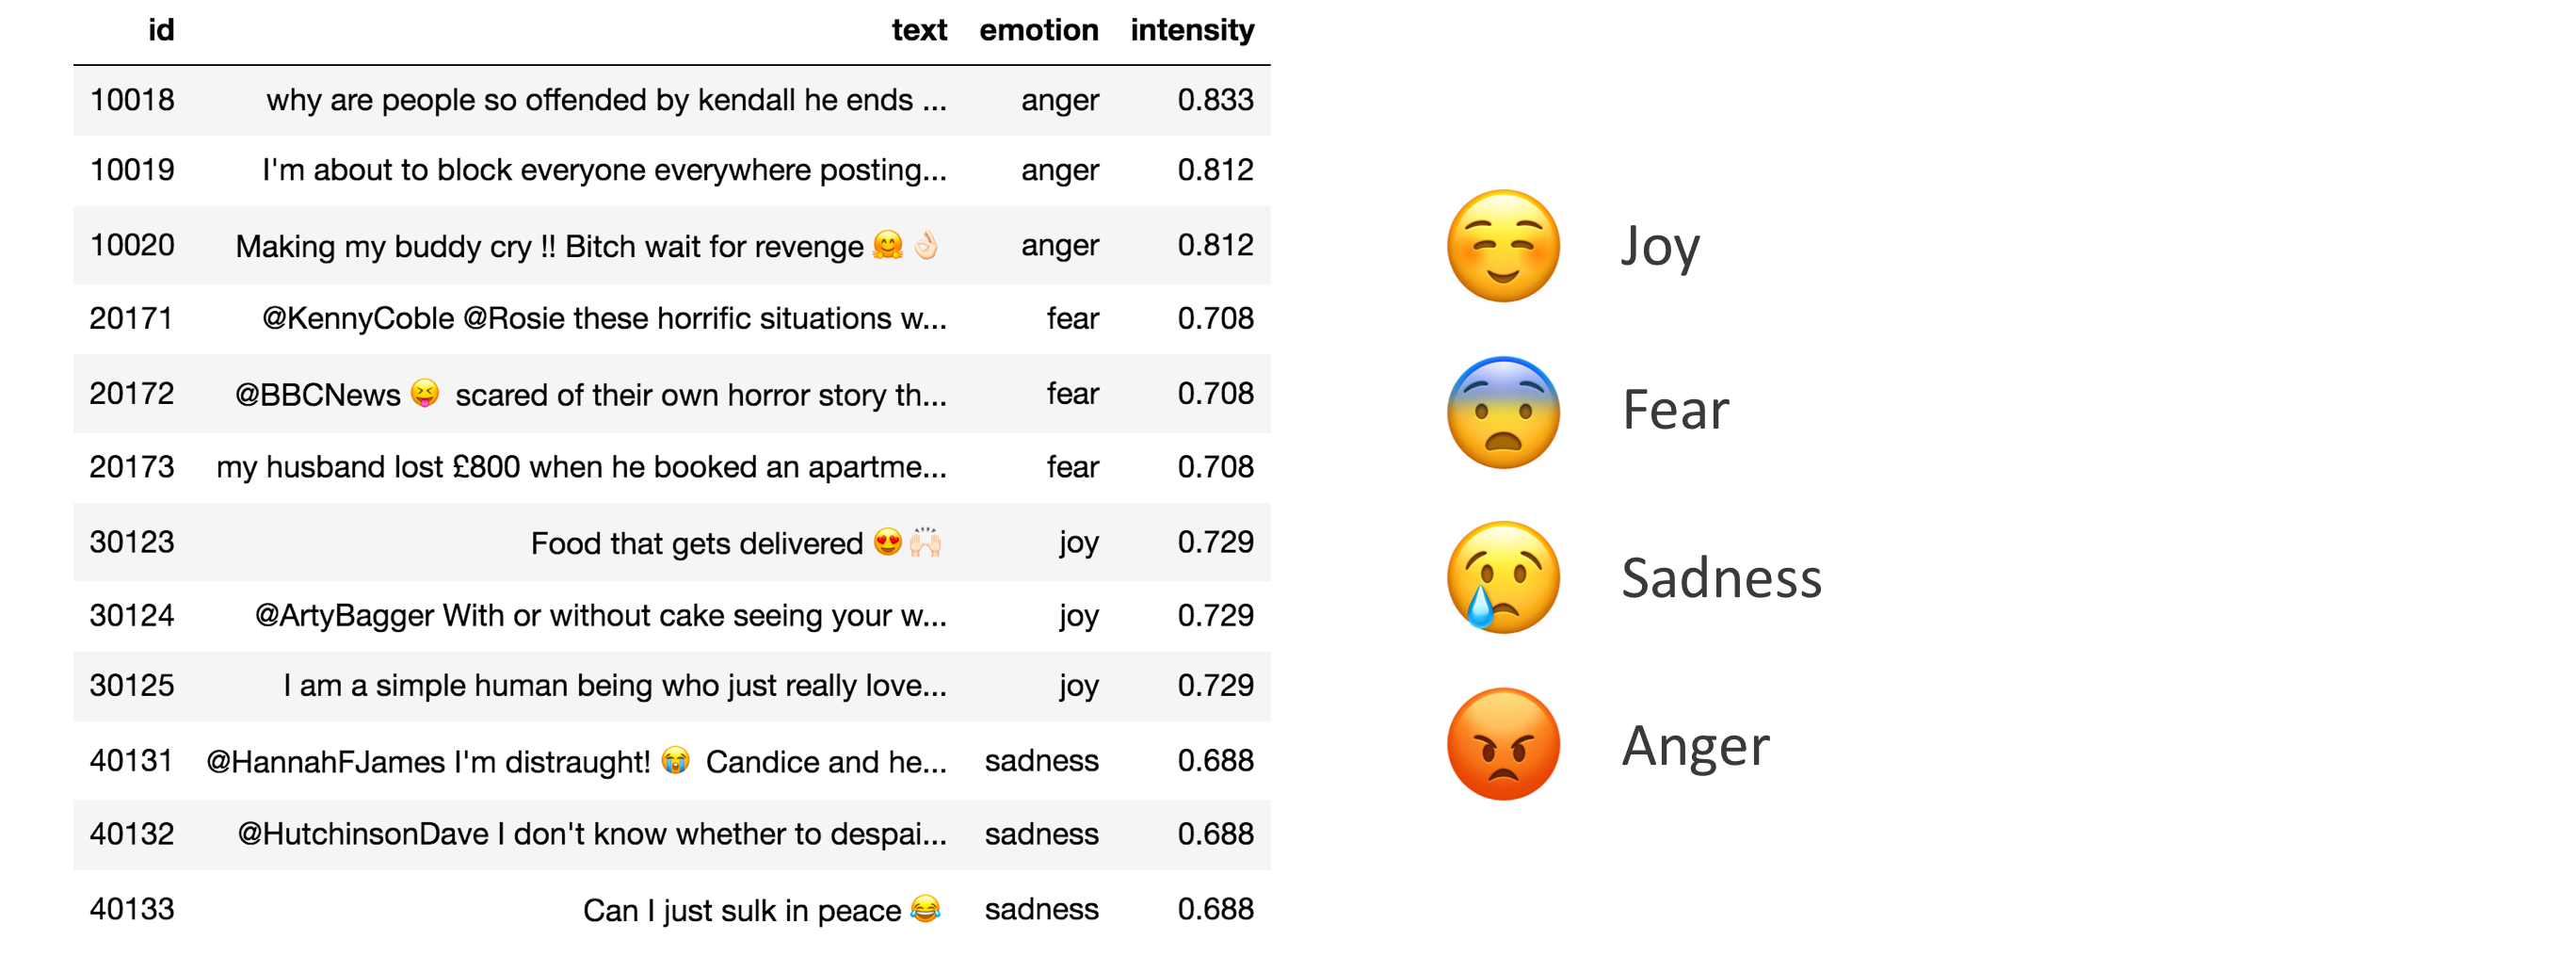

In [ ]:
from IPython.display import Image
Image('/content/DM2024-Lab2-Master/pics/pic0.png')

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
anger_train

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
852,10852,rose incense are the best thing I've ever bought,anger,0.125
853,10853,@jaaames1993 Literally burst out laughing.,anger,0.067
854,10854,Follow up. Follow through. Be . #success,anger,0.125
855,10855,Wrinkles should merely hide where frown have b...,anger,0.125


In [ ]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [ ]:
train_df

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
3608,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
3609,40782,Just put the winter duvet on ☃️❄️🌬☔️,sadness,0.104
3610,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
3611,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


In [ ]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
test_df

,id,text,emotion,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708
...,...,...,...,...
342,40855,Common app just randomly logged me out as I wa...,sadness,0.833
343,40856,"I'd rather laugh with the rarest genius, in be...",sadness,0.688
344,40857,If you #invest in my new #film I will stop ask...,sadness,0.458
345,40858,"Just watched Django Unchained, Other people ma...",sadness,0.333


In [ ]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [ ]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### **>>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


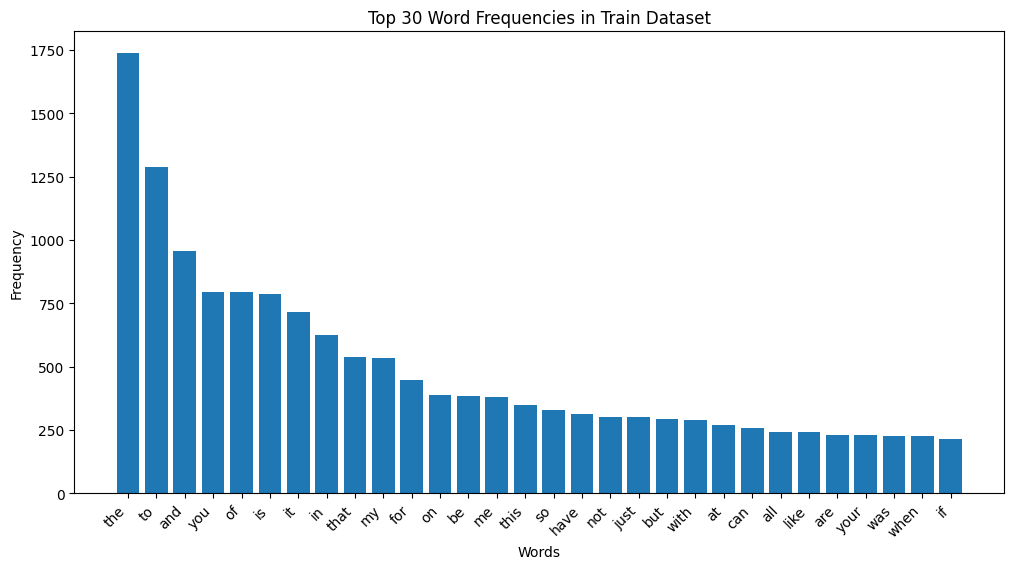

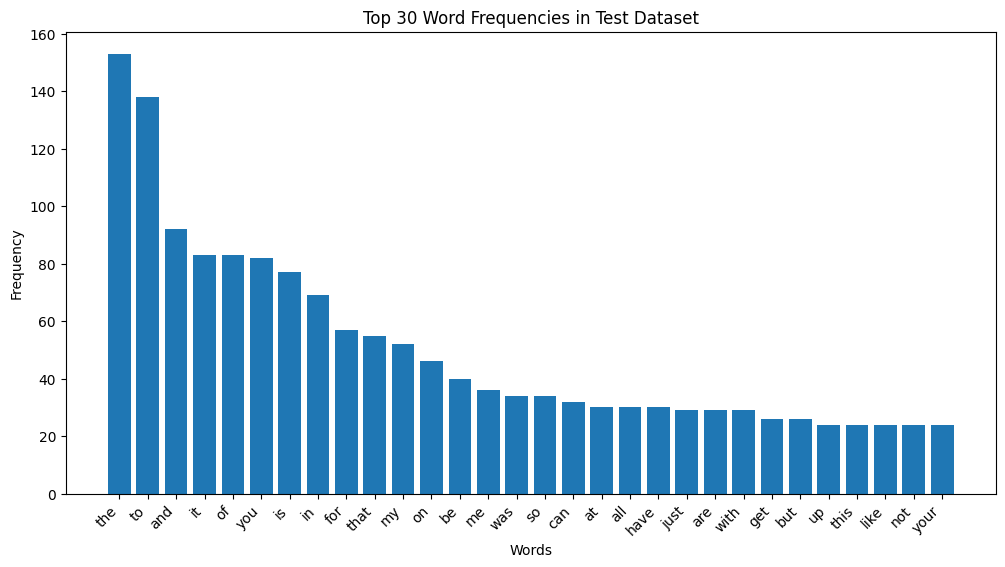

In [ ]:
# Answer here
# Generate the code to calculate and plot the top 30 word frequencies in the train and test datasets.
# This code assumes that 'train' and 'test' datasets are already loaded in DataFrame format,
# with text data in a column named 'text'.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Placeholder DataFrames for demonstration, in practice, replace with actual 'train' and 'test' data
# train = pd.DataFrame({'text': [...]})  # Load your train dataset here
# test = pd.DataFrame({'text': [...]})   # Load your test dataset here

train = train_df
test = test_df

# Function to calculate and plot top 30 word frequencies
def plot_top_words(data, dataset_name, top_n=30):
    # Initialize the CountVectorizer
    vectorizer = CountVectorizer()
    # Fit and transform the text data
    word_counts = vectorizer.fit_transform(data['text'])
    # Sum up the occurrences of each word
    word_sums = word_counts.sum(axis=0)
    # Get the words and their corresponding counts
    words_freq = [(word, word_sums[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    # Sort words by frequency
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    # Split words and counts for plotting
    words, counts = zip(*sorted_words)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top {top_n} Word Frequencies in {dataset_name} Dataset')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

# Usage
plot_top_words(train, 'Train')
plot_top_words(test, 'Test')

# This code will output two bar plots, each displaying the top 30 words in the train and test datasets, respectively.


---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [ ]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [ ]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [ ]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


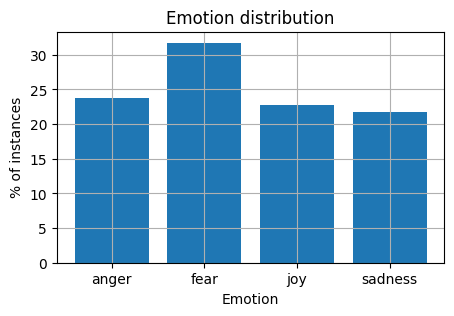

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [ ]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [ ]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [ ]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [ ]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [ ]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [ ]:
"😂" in feature_names

False

## Let's try using another tokenizer below.

In [ ]:
!pip install --upgrade nltk

In [ ]:
import nltk
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [ ]:
#整合成功版本
# 處理 nltk 資料路徑問題
import nltk

# 如果有問題，可以指定 nltk 資料路徑
nltk.data.path.append('/path/to/nltk_data')  # 替換為適合的路徑
nltk.download('punkt')  # 確保 punkt 資料下載完成

# 如果 nltk 的內建分詞器問題持續，則使用自訂分詞器
import re
from sklearn.feature_extraction.text import CountVectorizer

# 定義自訂分詞器
def simple_tokenizer(text):
    """
    自訂簡單的分詞器：將文字轉為小寫，並使用正則表達式提取單字
    """
    return re.findall(r'\b\w+\b', text.lower())

# 初始化 CountVectorizer，使用自訂分詞器
BOW_500 = CountVectorizer(max_features=500, tokenizer=simple_tokenizer)

# 假設 train_df 是你的訓練資料，包含 'text' 欄位
BOW_500.fit(train_df['text'])  # 擬合訓練資料
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])  # 轉換為特徵矩陣

# 確認特徵矩陣的維度
print(train_data_BOW_features_500.shape)  # 顯示 (樣本數, 特徵數)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)


In [ ]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['despair', 'did', 'didn', 'discouraged', 'do', 'does', 'doesn',
       'doing', 'don', 'done'], dtype=object)

In [ ]:
"😂" in feature_names_500

False

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# 假設 train_df 已經載入並且包含一個名為 'text' 的欄位，該欄位存放文本數據
# 此處的 train_df 應為實際資料集的 DataFrame

# 定義 TF-IDF 向量生成器並設定 1000 個特徵
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# 使用 TF-IDF 向量生成器擬合訓練資料的 'text' 欄位，生成特徵向量
tfidf_vectorizer.fit(train_df['text'])

# 取得特徵名稱，並顯示索引 100 到 110 的特徵名稱
feature_names = tfidf_vectorizer.get_feature_names_out()[100:110]

# 顯示特徵名稱的輸出
print(feature_names)


['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'anger', 'sadness', 'anger', 'fear', 'fear', 'joy', 'fear',
       'sadness', 'anger'], dtype=object)

---
## 4. Results Evaluation
Now we will check the results of our model's performance

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.98
testing accuracy: 0.7


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.73      0.67        84
        fear       0.74      0.71      0.73       110
         joy       0.71      0.73      0.72        79
     sadness       0.73      0.62      0.67        74

    accuracy                           0.70       347
   macro avg       0.70      0.70      0.70       347
weighted avg       0.70      0.70      0.70       347



In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[61 10  9  4]
 [14 78 11  7]
 [ 7  8 58  6]
 [15  9  4 46]]


In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()


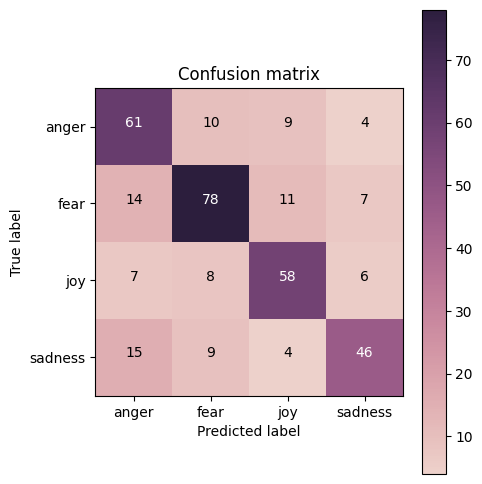

In [ ]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

### [Answer here]
此圖為**混淆矩陣**，通常用來評估分類模型的效果。以下是對圖表的解釋：

### 混淆矩陣的構成
- **縱軸（True label）**：真實的標籤，表示資料的真實情緒類別（anger、fear、joy、sadness）。
- **橫軸（Predicted label）**：模型預測的標籤，表示模型預測的情緒類別。
- **數字值**：矩陣中每個格子中的數字代表該分類的樣本數。例如，左上角的數字「61」表示真實標籤為「anger」且被正確預測為「anger」的樣本數為 61。

### 主要觀察點
1. **正確分類**（對角線上的數字）：在對角線上的數字表示模型正確分類的樣本數，例如：
   - 「anger」被正確分類的樣本數為 61。
   - 「fear」被正確分類的樣本數為 78。
   - 其他類別也同理。
   
2. **錯誤分類**（非對角線上的數字）：在非對角線上的數字表示模型錯誤分類的情況，例如：
   - 9 個「anger」樣本被錯誤分類為「joy」。
   - 14 個「fear」樣本被錯誤分類為「anger」。
   - 這些數字顯示了模型在哪些類別之間容易混淆。

3. **分類表現的總結**：
   - **最佳分類效果**出現在「fear」，模型正確分類 78 個樣本。
   - **錯誤率較高**的分類是「sadness」，其中有 15 個樣本被錯誤分類為「anger」。

### 結論
- 這個混淆矩陣顯示了模型的整體表現。大部分樣本都被正確分類，但某些情緒類別之間的錯誤分類率較高，說明模型可能在「anger」和「fear」之間、以及「sadness」和「anger」之間存在混淆。
- **優化方向**：可以考慮改進模型的特徵選取或採用更複雜的模型，以減少這些錯誤分類，提高模型的整體分類準確率。

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

### [Answer here]
## 單純貝氏(Naive Bayes) 模型通常適合用於文本分類，且在高維數據上效果良好。
* 準確率 (Accuracy)：顯示模型在測試集上整體的準確性。
* 分類報告 (Classification Report)：提供每個情緒類別的精確率 (precision)、召回率 (recall) 和 F1 分數，方便檢查模型在每個類別的表現。
* 混淆矩陣 (Confusion Matrix)：顯示模型在各情緒類別上的正確分類與錯誤分類情況，幫助觀察模型在哪些情緒類別之間易出現混淆。

In [ ]:
print(train_df.columns)

Index(['id', 'text', 'emotion', 'intensity'], dtype='object')


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 假設 train_df 已經載入並且包含 'text' 和 'emotion' 欄位，分別表示文本數據和其對應的情緒標籤

# 第一步：準備數據
# 將數據分為訓練集和測試集（例如，80% 用於訓練，20% 用於測試）
X_train, X_test, y_train, y_test = train_test_split(train_df['text'], train_df['emotion'], test_size=0.2, random_state=42)

# 第二步：將文本數據轉換為 TF-IDF 特徵
# 使用 1000 個特徵，與之前的練習保持一致
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# 將訓練數據進行擬合並轉換為 TF-IDF 特徵矩陣，測試數據進行轉換
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 第三步：訓練 Naive Bayes 模型
# 使用 MultinomialNB 模型，這種模型適合文本分類
nb_model = MultinomialNB()

# 在訓練數據上擬合模型
nb_model.fit(X_train_tfidf, y_train)

# 第四步：在測試集上進行預測
y_pred = nb_model.predict(X_test_tfidf)

# 第五步：評估模型
# 計算準確率、分類報告和混淆矩陣
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# 顯示結果
print("準確率:", accuracy)
print("\n分類報告:\n", classification_rep)
print("\n混淆矩陣:\n", confusion_mat)

準確率: 0.7676348547717843

分類報告:
               precision    recall  f1-score   support

       anger       0.89      0.75      0.82       177
        fear       0.64      0.91      0.75       222
         joy       0.94      0.76      0.84       173
     sadness       0.75      0.58      0.65       151

    accuracy                           0.77       723
   macro avg       0.80      0.75      0.77       723
weighted avg       0.80      0.77      0.77       723


混淆矩陣:
 [[133  34   1   9]
 [  4 203   5  10]
 [  5  26 132  10]
 [  7  54   3  87]]


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### [Answer here]

Naive Bayes 模型和決策樹模型的結果比較會顯示出兩者在準確性、穩定性和解釋性上的差異。以下是對這些差異的比較與解釋：

### 結果比較

1. **準確率與表現**：
   - **Naive Bayes** 模型通常在文本分類這類高維度、稀疏數據上表現較好，因為它依賴於條件獨立假設，能夠有效地處理大量特徵，並且計算速度快。
   - **決策樹** 模型在這類數據上可能效果較差，特別是當數據特徵之間存在複雜關係時，決策樹可能無法充分捕捉這些關係。

2. **錯誤率與類別區分**：
   - Naive Bayes 模型通常在多分類問題中能提供較穩定的表現，特別是在類別之間的錯誤分類較少，這是由於它基於概率計算。
   - 決策樹模型可能會出現更多的錯誤分類，特別是在邊界類別或數據不平衡的情況下，決策樹容易受到數據分佈的影響，出現過擬合現象。

3. **解釋性**：
   - 決策樹模型具有高度的解釋性，可以清晰地展示出分類的決策路徑，有助於理解模型如何對每個特徵進行分類決策。
   - 相對而言，Naive Bayes 模型的解釋性較低，因為它只依賴於概率計算，無法顯示具體的決策流程。

### 理論背景解釋

1. **Naive Bayes 模型**：
   - Naive Bayes 模型基於條件獨立假設，即假設每個特徵在給定類別的情況下是相互獨立的。這個假設在某些情況下不完全符合現實，但在高維文本數據中，這一假設可以簡化計算，提升模型的訓練速度。
   - 優點：適合高維度、稀疏數據；訓練和預測速度快；不容易過擬合。
   - 缺點：當特徵之間存在較強的依賴關係時，模型表現可能會下降。

2. **決策樹模型**：
   - 決策樹模型基於遞迴劃分數據空間的方式進行分類，會根據特徵的重要性進行逐層的分支決策。決策樹在特徵之間存在複雜關係時表現較好，因為它能自動捕捉這些特徵間的相互影響。
   - 優點：具有高度解釋性；能處理特徵之間存在依賴關係的數據；適合低維或中等維度數據。
   - 缺點：容易過擬合；在高維度數據或稀疏數據上表現不穩定；在類別不平衡的情況下表現較差。

### 結論
總結來說，Naive Bayes 模型在高維、稀疏的文本分類任務中通常表現優於決策樹，因為它能有效地處理大量特徵且避免過擬合。決策樹則適合在特徵數較少且存在依賴關係的數據上應用。根據數據的特性選擇合適的模型，才能達到最佳的分類效果。

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

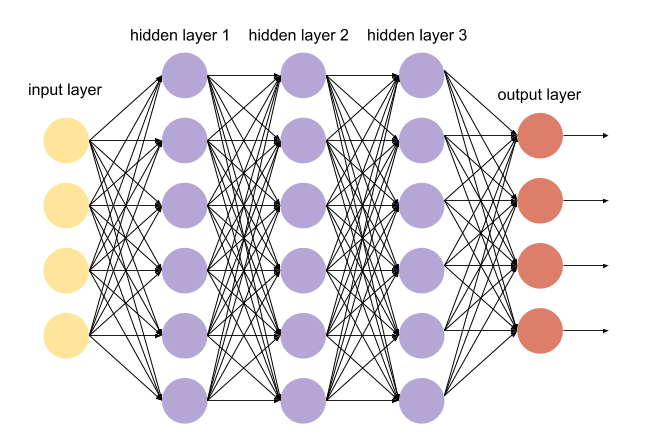

In [ ]:
from IPython.display import Image
Image('/content/DM2024-Lab2-Master/pics/pic1.png')

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)

In [ ]:
# 先卸載 tensorflow
# 第一次執行 jupyter notebook 建議跑一次
!pip uninstall tensorflow-cpu

Found existing installation: tensorflow_cpu 2.18.0
Uninstalling tensorflow_cpu-2.18.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/api_packages.txt
    /usr/local/lib/python3.10/dist-packages/tensorflow/compiler/mlir/lite/converter_flags_pb2.py
    /usr/local/lib/python3.10/dist-packages/tensorflow/compiler/mlir/lite/metrics/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/compiler/mlir/lite/model_flags_pb2.py
    /usr/local/lib/python3.10/dist-packages/tensorflow/compiler/mlir/lite/types_pb2.py
    /usr/local/lib/python3.10/dist-packages/tensorflow/compiler/xla/tsl/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/include/Eigen/src/Core/DeviceWrapper.h
    /usr/local/lib/python3.10/dist-packages/tensorflow/include/Eigen/src/ThreadPool/CoreThreadPoolDevice.h
    /usr/local/lib/python3.10/dist-packages/tensorflow/include/external/XNNPACK/LICENSE
    /usr/local/lib/python3.10/dist-packages/tensorflow/include/external/curl/lib/vquic/curl_o

### 6.1 Prepare data (X, y)

### tensorflow 安裝完畢之後需要重啟 kernel
重啟之後這一段不用執行

In [ ]:
!pip install keras
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 3364 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.

In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1050       fear
477       anger
3486    sadness
262       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


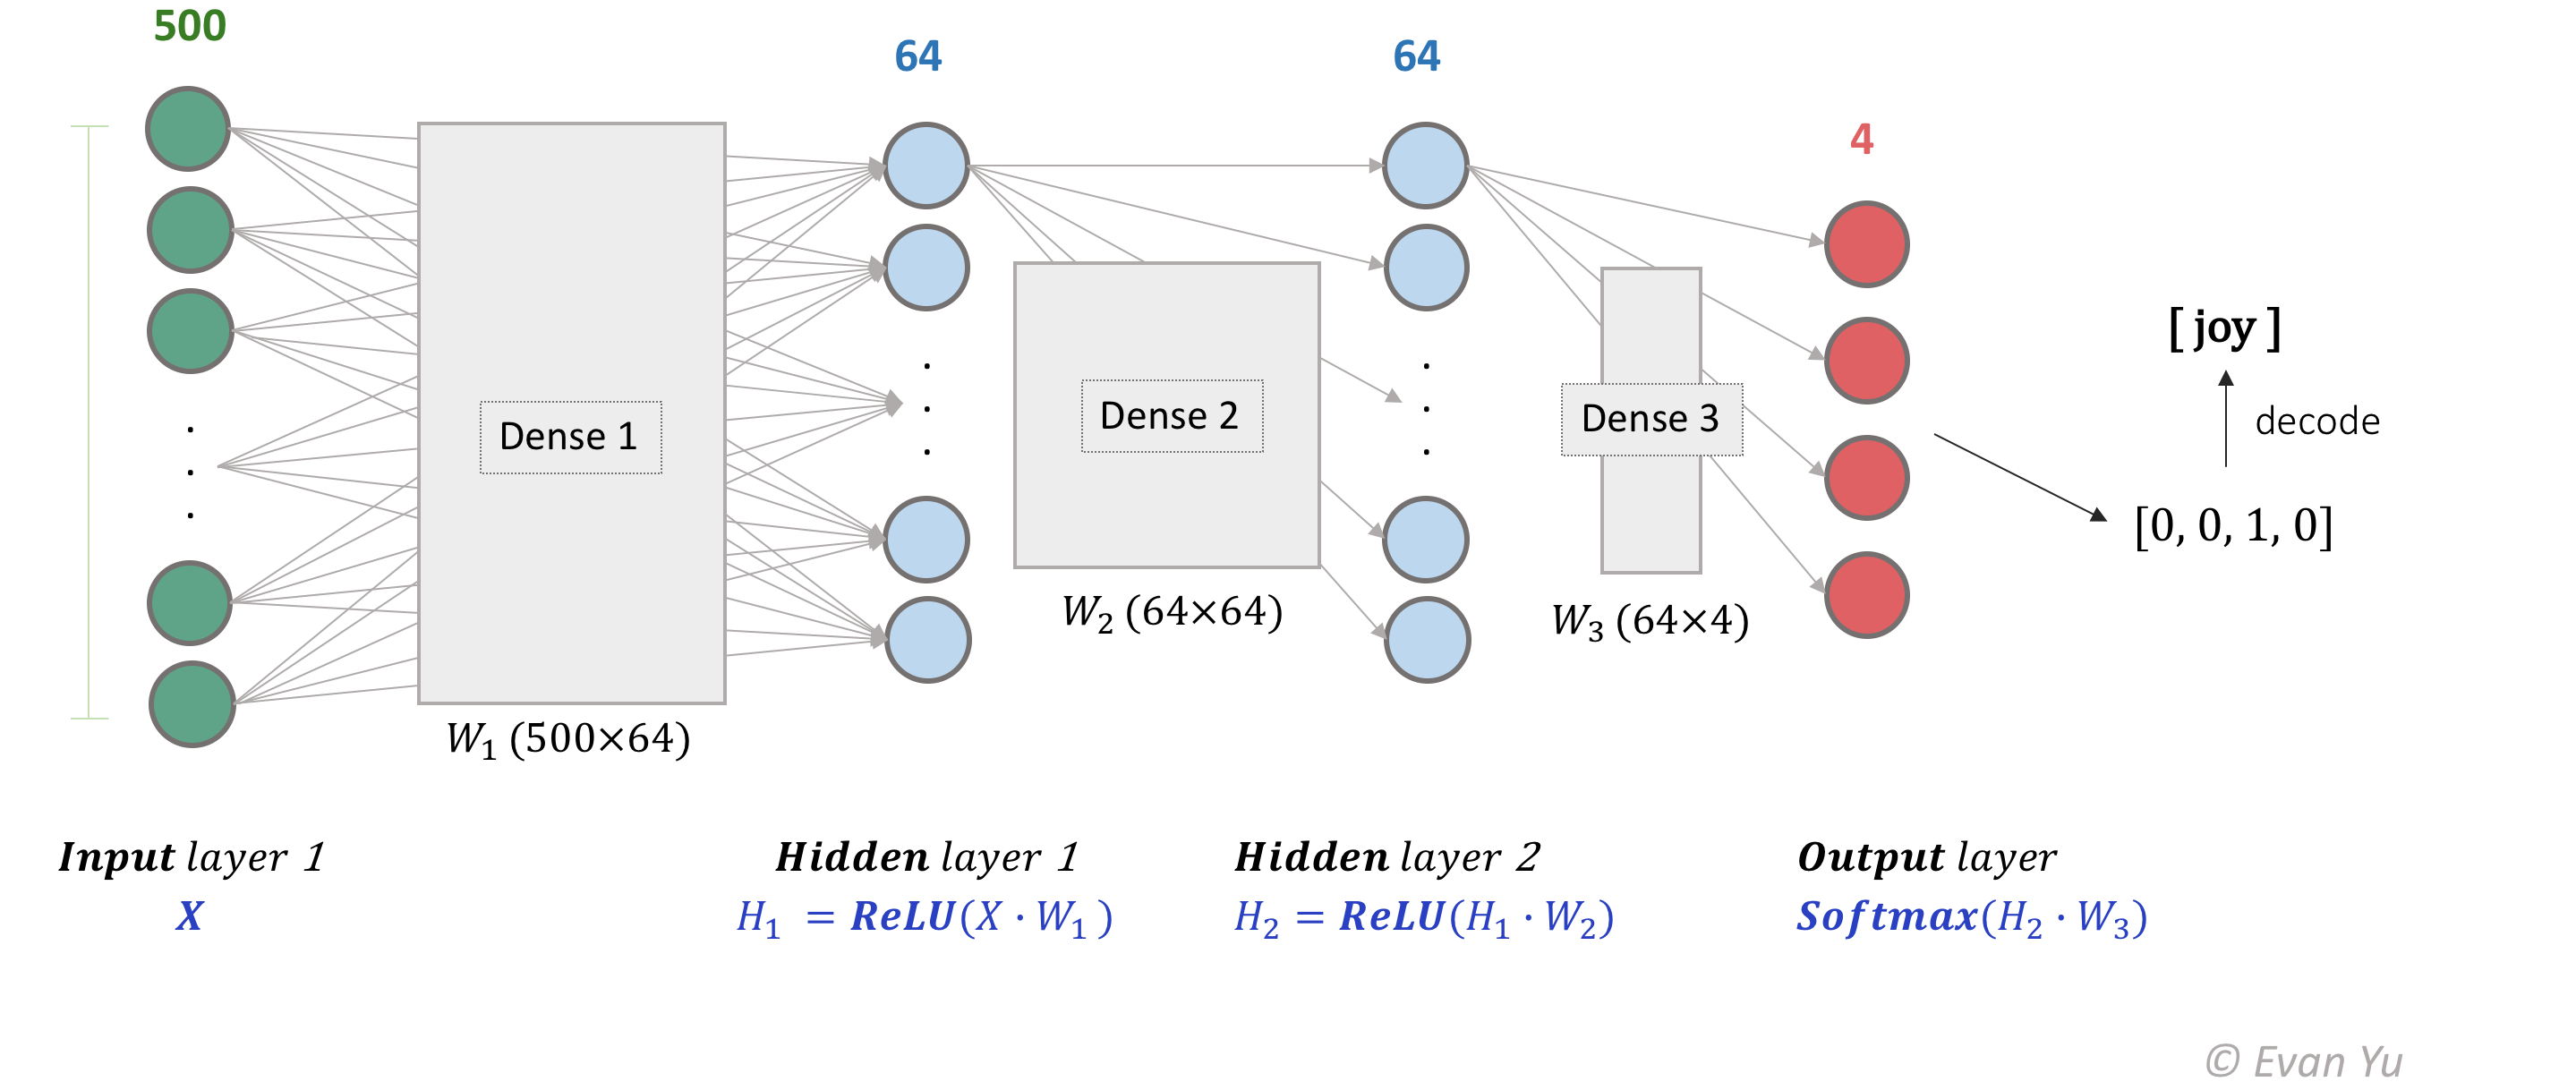

In [ ]:
from IPython.display import Image
Image('/content/DM2024-Lab2-Master/pics/pic2.png')

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3252 - loss: 1.3644 - val_accuracy: 0.4380 - val_loss: 1.2699
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6458 - loss: 1.0406 - val_accuracy: 0.6859 - val_loss: 0.8436
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8172 - loss: 0.5487 - val_accuracy: 0.7176 - val_loss: 0.7278
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8677 - loss: 0.3734 - val_accuracy: 0.6974 - val_loss: 0.8070
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8944 - loss: 0.3065 - val_accuracy: 0.7061 - val_loss: 0.7896
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9239 - loss: 0.2367 - val_accuracy: 0.6744 - val_loss: 0.8189
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9399 - loss: 0.1930 - val_accuracy: 0.7061 - val_loss: 0.9108
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9589 - loss: 0.1488 - val_accuracy: 0.

### 6.5 Predict on testing data

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[3.3824616e-03, 5.8721136e-03, 5.4141182e-02, 9.3660432e-01],
       [9.9994665e-01, 5.1893635e-06, 4.4238288e-07, 4.7588343e-05],
       [4.6265493e-05, 1.1887719e-03, 1.3278501e-09, 9.9876499e-01],
       [9.9860418e-01, 8.0575119e-04, 6.6928787e-06, 5.8336201e-04],
       [1.8800755e-08, 9.9999875e-01, 8.8077371e-07, 3.8969424e-07]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'anger', 'sadness', 'anger', 'fear'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [ ]:
# Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.382508,1.330031,0.438040,1.269884
1,1,0.677553,0.930847,0.685879,0.843609
2,2,0.808746,0.530123,0.717579,0.727787
3,3,0.859120,0.389999,0.697406,0.807031
4,4,0.888182,0.310321,0.706052,0.789635
5,5,0.914199,0.255368,0.674352,0.818860
6,6,0.931082,0.208395,0.706052,0.910758
7,7,0.943537,0.175377,0.654179,0.987782
8,8,0.950733,0.160802,0.674352,1.040412
9,9,0.961251,0.132661,0.697406,1.066989


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

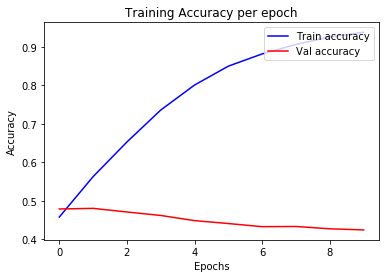

In [ ]:
from IPython.display import Image
Image('/content/DM2024-Lab2-Master/pics/pic3.png')

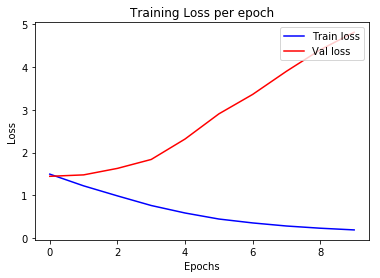

In [ ]:
from IPython.display import Image
Image('/content/DM2024-Lab2-Master/pics/pic4.png')

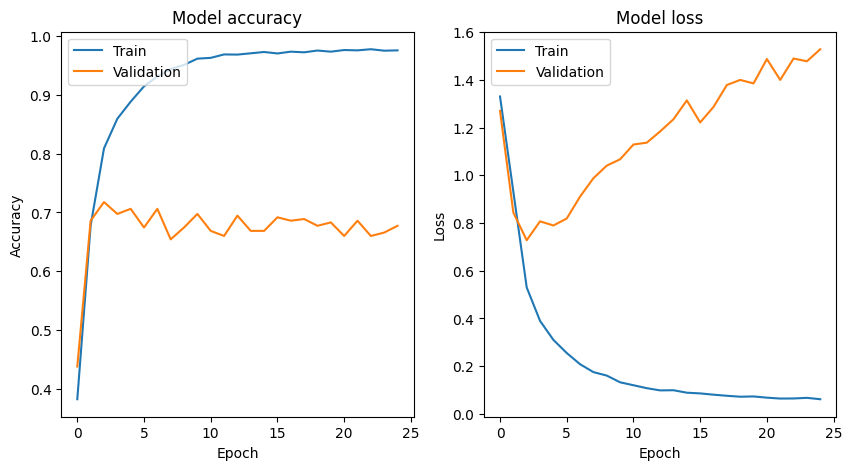

In [ ]:
# Answer here

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 畫出來的結果和範例圖片差很大

 /content/DM2024-Lab2-Master/pics/pic3.png
 /content/DM2024-Lab2-Master/pics/pic4.png


你所看到的訓練結果與範例圖片有很大的差異，這可能是因為以下幾個原因：

### 模型結構和數據集不同：範例圖片中的模型可能與你的模型結構不同，例如層數、神經元數量、激活函數等。此外，範例圖片使用的數據集也可能與你的數據集不同，導致訓練結果的差異。

### 超參數設定：超參數的設定，例如學習率、批次大小、迭代次數等，會影響模型的訓練過程和結果。範例圖片中的模型使用的超參數可能與你的模型不同，導致訓練結果的差異。

### 數據預處理：數據預處理的方式，例如文本清洗、特徵工程等，也會影響模型的訓練結果。範例圖片中的模型使用的數據預處理方法可能與你的模型不同，導致訓練結果的差異。

### 隨機性：深度學習模型的訓練過程存在一定的隨機性，例如權重初始化、數據的隨機打亂等。即使使用相同的模型結構和超參數，每次訓練的結果也可能略有不同。


## 建議的解決方案

### 檢查模型結構和超參數：仔細檢查你的模型結構和超參數設定，並與範例圖片中的模型進行比較。嘗試調整超參數，例如學習率、批次大小、迭代次數等，看看是否能改善訓練結果。

### 優化數據預處理：嘗試不同的數據預處理方法，例如使用不同的分詞器、特徵工程方法等，看看是否能提升模型的訓練效果。

### 增加數據量：如果你的數據集比較小，可以嘗試增加數據量，例如收集更多數據或使用數據增強技術。

### 使用不同的模型：如果你的模型結構比較簡單，可以嘗試使用更複雜的模型，例如循環神經網絡 (RNN) 或卷積神經網絡 (CNN)。

### 多次訓練：由於深度學習模型的訓練過程存在隨機性，可以嘗試多次訓練模型，並選擇表現最佳的模型。


## 額外說明

* 在深度學習模型的訓練過程中，觀察訓練曲線和驗證曲線是評估模型表現的重要方法。如果訓練曲線和驗證曲線的趨勢差異較大，例如訓練準確率持續上升而驗證準確率下降，則可能表示模型出現過擬合現象。這時可以嘗試使用正則化技術，例如 L1 或 L2 正則化，或是使用 Dropout 技術，來減少模型的過擬合現象。

* 深度學習模型的訓練是一個需要不斷嘗試和調整的過程，需要根據具體情況選擇合適的模型結構、超參數和數據預處理方法。通過觀察訓練曲線和驗證曲線，以及使用不同的評估指標，可以評估模型的表現，並逐步改善模型的訓練效果。


### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

In [ ]:
!pip install nltk

In [ ]:
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,id,text,text_tokenized
1050,20193,I had a panic attack when I couldn't find @kat...,"[I, had, a, panic, attack, when, I, could, n't..."
477,10477,When you forget to mention you were bought dre...,"[When, you, forget, to, mention, you, were, bo..."
3486,40659,"@cherrivarisco @audubonsociety Oh yes, males a...","[@, cherrivarisco, @, audubonsociety, Oh, yes,..."
262,10262,@alicehouston18 sorry I'm just angry my drone ...,"[@, alicehouston18, sorry, I, 'm, just, angry,..."
3306,40479,The Sunderland time line is quite funny with a...,"[The, Sunderland, time, line, is, quite, funny..."


In [ ]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['I', 'had', 'a', 'panic', 'attack', 'when', 'I', 'could', "n't", 'find', '@', 'katrinalaw', 'on', '#', 'Twitter', 'Turns', 'out', 'my', 'Twitter', 'is', 'a', 'jerk', '.', 'I', 'can', 'still', 'see', 'her', '.', '#', 'NyssaAlghul']),
       list(['When', 'you', 'forget', 'to', 'mention', 'you', 'were', 'bought', 'dreamboys', 'tickets', '🙄😂', '#', 'raging']),
       list(['@', 'cherrivarisco', '@', 'audubonsociety', 'Oh', 'yes', ',', 'males', 'are', 'colourful', 'and', 'the', 'Females', 'are', 'dull', ',', 'so', 'that', 'they', 'can', 'blend', 'in', 'to', 'their', 'environment', '.'])],
      dtype=object)

## 7.2 Training our model
You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [ ]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.1193631 ,  0.14419734,  0.1162382 ,  0.10860784,  0.04174026,
       -1.0348347 ,  0.64860094,  1.31631   , -0.7210567 , -0.647975  ,
       -0.8165027 , -0.4803238 , -0.3057859 ,  0.562295  , -0.17736173,
       -0.44966817,  0.32485765, -0.34014818,  0.41630307, -1.3859841 ,
        0.7429391 ,  0.8407437 ,  0.71650046, -0.04643296,  0.07869068,
       -0.11331321, -0.42558995,  0.6793451 , -0.10283958,  0.28261176,
        0.19513756, -0.01741536,  0.7363275 , -0.6938581 , -0.39574847,
        0.4930786 ,  0.2282031 , -0.10076296, -0.51934856, -0.22419176,
        0.38006523,  0.25467864, -0.40456352,  0.4979619 ,  0.92156863,
       -0.12292274, -0.5720935 , -0.21951342,  0.48399338,  0.41584173,
        0.28606048, -0.28757727, -0.15556479, -0.27825984, -0.5339808 ,
       -0.42235267, -0.10061804, -0.28012592, -0.16533378, -0.18387665,
        0.20336841, -0.05819766, -0.0882631 ,  0.2893942 , -0.6640561 ,
        0.6030387 ,  0.58860123,  0.36810064, -1.5284681 ,  0.25

In [ ]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('help', 0.9305391311645508),
 ('Makes', 0.929156482219696),
 ('blessed', 0.9164316654205322),
 ('Be', 0.9145757555961609),
 ('free', 0.9122879505157471),
 ('folks', 0.9117671251296997),
 ('angry', 0.9103342890739441),
 ('ship', 0.9094102382659912),
 ('PUSSY\\nP', 0.9070423245429993),
 ('kinda', 0.9058682918548584)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [95]:
!ls -al /content/DM2024-Lab2-Master/GoogleNews/

total 869392
drwxr-xr-x 3 root root      4096 Nov 16 17:37 .
drwxr-xr-x 8 root root      4096 Nov 16 17:13 ..
-rw-r--r-- 1 root root 890241024 Nov 16 17:58 GoogleNews-vectors-negative300.bin.gz
drwxr-xr-x 2 root root      4096 Nov 16 17:21 .ipynb_checkpoints


In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

## 7.5 king + woman - man = ?
Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [ ]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?

# Answer here
